# Assignment 2 Task 

**If you've not got an M1 macbook, this will almost certainly be quicker on Colab or a lab machine**

Provide written answers to questions 3-5 , along with any sample outputs you would like to include. as pdf


1. Find an image dataset
    
You will want at least 1000 images 
    
    
Try looking through [Kaggle](kaggle.com) or [Data is Plural](https://docs.google.com/spreadsheets/d/1wZhPLMCHKJvwOkP4juclhjFgqIY8fQFMemwKL2c64vk/edit#gid=0) (search "images" for example!), or [this list](https://imerit.net/blog/22-free-image-datasets-for-computer-vision-all-pbm/) or [this art database](https://data.world/datasets/art). Or even the Celeb faces dataset from the David Foster book! Or you may want to scrape images from google or instagram etc..., but you will need lots!


2. Train a model for a number of epochs. The amount you need to do will depend on the size of your dataset. You may want to keep on training if to improve. You can always save and reload a model then keep training (see code below)! For my dataset of 12,000 signs, I trained for 60 epochs. It took about 2hrs on the Macbook M1.


3. Use the code given generate a set of images interpolated between two points in the latent space. Does it seem like images next to each other have similar qualities? If so, how?


5. Describe a creative piece or creative industry use case in which this model might be useful. What are the advantages and disadvantages over current non generative methods?


Don't get too concerned if your image quality isn't great, given the size of datasets and a relatively simple model, everything is going to be pretty blurry / low res! If you're getting a variety of images, and recognisable changes across interpolation vectors, **you're doing great**. Or if you just want to write about the **road signs models**, I'm not here to judge. 

# Loading the dataset

Pick your image size. Smaller will train quicker, but your images will have less resolution! I don't recommend going higher than 128 x 128

In [1]:
!unzip "/content/Jelly Fish.zip" -d "/content/Jelly Fish/"

Archive:  /content/Jelly Fish.zip
  inflating: /content/Jelly Fish/Jelly Fish/024HS8JL4B7N.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/032SQLDDBZ3P.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/03Q7BTGDW34G.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/042IQUM3JAW7.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/04F006TXFV37.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/05JMKE01HJUS.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/05LOI7RGPBNJ.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/06LPLGSUQTEZ.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/06XKFLMMT8OB.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/07VAL21MIYUW.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/07W0TJRZFWQF.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/08D2IY6N7DG8.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/0959B10W414J.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/09H26SX6025L.jpg  
  inflating: /content/Jelly Fish/Jelly Fish/10IIUL1GQIYY.jpg  
  inflating: /content

In [2]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Pick image size
img_height = 128
img_width = 128
#Is it rgb or black and white?
channels = 3

In [4]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

### Can you load in the images?
Dataset: https://images.cv/dataset/jellyfish-image-classification-dataset


In [5]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Path to folder
path_to_images = "/content/Jelly Fish"
#image extension
file_type = ".jpg"

In [6]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Get all paths
paths = []
for root, dirs, files in os.walk(path_to_images, topdown=False):
    for name in files:
     ## Get all the ".wav" files
      if file_type in name.lower():
        paths.append(str(os.path.join(root, name)))
paths

['/content/Jelly Fish/Jelly Fish/4830TRSZXKY4.jpg',
 '/content/Jelly Fish/Jelly Fish/XJT63HDMP9JI.jpg',
 '/content/Jelly Fish/Jelly Fish/GG5UOUTRB6ER.jpg',
 '/content/Jelly Fish/Jelly Fish/856GJK649AST.jpg',
 '/content/Jelly Fish/Jelly Fish/6YHRTE7AXOUZ.jpg',
 '/content/Jelly Fish/Jelly Fish/UNSJOZTGP1HS.jpg',
 '/content/Jelly Fish/Jelly Fish/5D14WNIYP6XO.jpg',
 '/content/Jelly Fish/Jelly Fish/5KZKWFXL6Q5I.jpg',
 '/content/Jelly Fish/Jelly Fish/KS7QQP4JJYKF.jpg',
 '/content/Jelly Fish/Jelly Fish/R2FZSL6248RT.jpg',
 '/content/Jelly Fish/Jelly Fish/JSXDCN8DVUVJ.jpg',
 '/content/Jelly Fish/Jelly Fish/UX49B80EX20R.jpg',
 '/content/Jelly Fish/Jelly Fish/KWI4KMC5Y269.jpg',
 '/content/Jelly Fish/Jelly Fish/C50CHWNDWG2V.jpg',
 '/content/Jelly Fish/Jelly Fish/SKQVC7BE84LR.jpg',
 '/content/Jelly Fish/Jelly Fish/Y0QB50MZ8P38.jpg',
 '/content/Jelly Fish/Jelly Fish/C7O09NVTP318.jpg',
 '/content/Jelly Fish/Jelly Fish/POJBKFGIO0L5.jpg',
 '/content/Jelly Fish/Jelly Fish/E32MUPM42SQ5.jpg',
 '/content/J

In [7]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Load in images
dataset = [np.array(img_to_array(load_img(i,target_size=((img_height,img_width)))))/255.0 for i in paths]
dataset = np.array(dataset).astype("float32")
dataset.shape

(1750, 128, 128, 3)

## Do you want a subset to train on?


In [8]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
dataset.shape

(1750, 128, 128, 3)

In [9]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
limit = 12000
dataset = dataset[:limit]

## Train model

In [10]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
from cci_autoencoders import init_VAE
from tensorflow import keras

In [11]:
##https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#How many latent dimensions?
image_dims = (img_width,img_height,channels)
latent_dim = 32

In [12]:
##https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Build model (dont re-run this if you dont want to lose training! This will reset your model)
vae = init_VAE(input_dims=image_dims, latent_dim = latent_dim)
vae.compile(optimizer=keras.optimizers.Adam())

In [ ]:
##https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Train (you can re-run this cell to train more without losing progress)
vae.fit(dataset, epochs=1)

58/58 [==============================] - 23s 389ms/step - loss: 51566.2852 - reconstruction_loss: 41396.1836 - kl_loss: 913.4172


### Load and Save models

In [ ]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Pick your path to save the models in (don'r overwrite existing models you want to keep!)
#path = "road_signs_models/"
path = "my_models"
!mkdir path

In [ ]:
##https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Save your models
vae.encoder.save(path+'encoder.tf')
vae.decoder.save(path+'decoder.tf')

INFO:tensorflow:Assets written to: my_modelsencoder.tf\assets
INFO:tensorflow:Assets written to: my_modelsdecoder.tf\assets


In [ ]:
##https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
from cci_autoencoders import load_from_file

In [ ]:
##https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#Load model from folder
#path = "road_signs_models/"
path = "my_models"
vae = load_from_file(path)
vae.compile(optimizer=keras.optimizers.Adam())

## Look at results

In [ ]:
##https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
from cci_autoencoders import generate_latent_points,interpolate_points,plot_generated
import matplotlib.pyplot as plt

## Everytime you run this code it will be a new random interpolation!

### Interpolation 

What happens in the code below is that 

1. We pick **two random points in latent space**


2. We then draw a straight line between them 


3. We then pick a number of equally spaced points along this line (determined by ``num_images``), and use these points to each generate an image from the ``decoder``. 


4. Hopefully, this interpolation will show a gradually changes features that exist in latent space (e.g. if it was faces it might go from blue eyes to brown eyes). Can you determine what the feature that exists along this vector  in latent space is?

In [ ]:
##https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
from PIL import Image
#Define custom function to display images
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

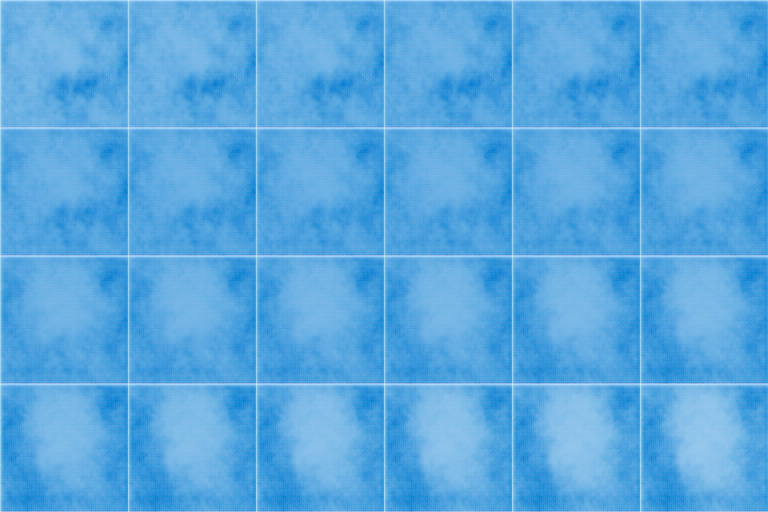

<Figure size 1080x1080 with 0 Axes>

In [ ]:
#https://git.arts.ac.uk/jmurr/ai-for-media-2022/blob/main/04-2_Auto_Encoders/02_assignment_2_vaes.ipynb
#How many images to generate?
num_images = 24

# generate points in latent space
pts = generate_latent_points(latent_dim, 2)
# interpolate points in latent space
interpolated = interpolate_points(pts[0], pts[1], num_images)
# generate images
X = vae.decoder(interpolated)
X *= 255
X.numpy()
generated_images = []
for i in range(num_images):
    generated_images.append(keras.preprocessing.image.array_to_img(X[i]))
plt.figure(figsize=(15,15))

#How to display images (rows x cols should equal num_images!)
image_grid(generated_images, 4, 6)

Use the code given generate a set of images interpolated between two points in the latent space. Does it seem like images next to each other have similar qualities? If so, how?

The images interpolated between two points in the latent space seem to have similar qualities. It is likely because the latent space encodes certain qualities of the images that are visually similar. It could account for image similarity. From a colour perspective, the dataset consists of Jellyfish that live predominantly in water and the likelihood that all photographs were taken when the body of water appeared blue is highly likely.


Describe a creative piece or creative industry use case in which this model might be useful?

A considerable movement we have seen is that in the space of generative art and NFTs, this has exploded in the last few years.
The creation of new digital assets has made art more accessible to the masses; these generative methods have also allowed for more unique/one of a kind value to be purchased by anyone.


Reference: https://buycryptonft.com/generative-art-and-nfts-where-is-the-real-value-d58f999201ad

What are the advantages and disadvantages over current non generative methods?

There are many advantages to using generative methods over current non-generative methods:
1.	Generative methods are much more efficient in terms of memory usage.
2.	They can often produce better quality results than non-generative methods. 
3.	Scalability, meaning that they can be used to generate more complex results on larger data sets. 
4.	Wider variety of results

The disadvantages: 
1.	Generative methods can be more complex and challenging to understand and use. 
2.	Second, they can be slower to generate results than non-generative methods. 
3.	They are expensive to implement in terms of computational resources.